In [162]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns
#sns.set_context('poster')
#plt.style.use('seaborn-darkgrid')

In [163]:
def shorten(arr, factor=10):
    arr_shape = list(arr.shape)
    arr_shape[0] = int(arr_shape[0]/factor)
    new_arr = np.zeros(arr_shape)
    for i in range(arr_shape[0]):
        new_arr[i] = arr[i*factor]
    return new_arr

In [151]:
# Change here for different observation gap and observation covariance parameter
mu=1.0
ob_gap=0.1

os.chdir('/home/shashank/Lorenz_63/40_dim_L96')
#factor in time
factor=1
#Partial or full observation
ob_dim=20
lambda_=1.0  #Mcov=0.01,0.1,1.0
bias=4.0     #0.0,3.0,6.0
#load the state
state=shorten(np.load('Trajectory_0.1_seed_35.npy'),factor)

k=2
N=50 #,120,140
l_scale=4
alpha=1.0
# State and obs
os.chdir(os.getcwd()+'/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H2__mu={}_obs_cov1.npy'.format(k,ob_gap,mu))

#Go inside the data folder......................................
file_label='bias={}_obs={}_ens={}_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=gaspri_r={}'.format(bias,ob_dim,N,lambda_,mu,ob_gap,l_scale)
os.chdir(file_label)
print(os.getcwd())
#Load data....
f_ens=np.load(file_label+'f_ensemble.npy')
a_ens=np.load(file_label+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean=np.mean(f_ens,axis=2)
a_mean=np.mean(a_ens,axis=2)
time=np.load(file_label+'time.npy')
time.shape

/home/shashank/Lorenz_63/40_dim_L96/ob2/bias=4.0_obs=20_ens=50_Mcov=1.0,ocov=1.0_,gap=0.1_alpha=1.0_loc=gaspri_r=4


(400,)

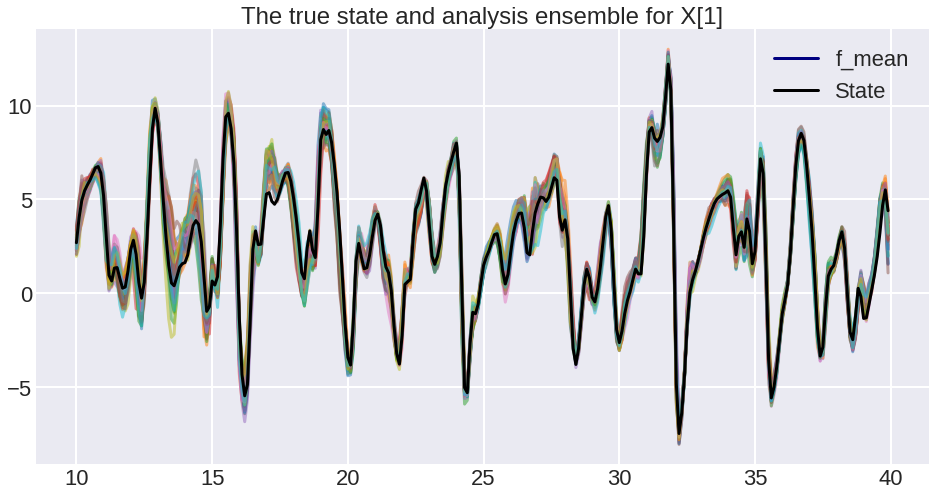

In [152]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=100
t_stop=400
# component to view
comp_=1

#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='navy',label='f_mean',alpha=1)
plt.plot(time[t_start:t_stop],a_ens[t_start:t_stop,comp_],linestyle='solid',alpha=0.5)  
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
if (comp_%2==0):
    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
    plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,int(comp_/2)], yerr=0.5, fmt='o',alpha=1, color='indigo',
                    ecolor='saddlebrown', elinewidth=3, capsize=0)
plt.legend()
plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend()

### Stability Plots:

In [164]:
os.chdir('/home/shashank/Lorenz_63/40_dim_L96/codes')
dist1=np.load('a_distance_between_bias,cov=4.0_1.0and0.0_0.1_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to100.npy')
dist2=np.load('a_distance_between_bias,cov=4.0_1.0and2.0_0.5_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to100.npy')
dist3=np.load('a_distance_between_bias,cov=2.0_0.5and0.0_0.1_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to100.npy')

/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'assimilation $\\to$')

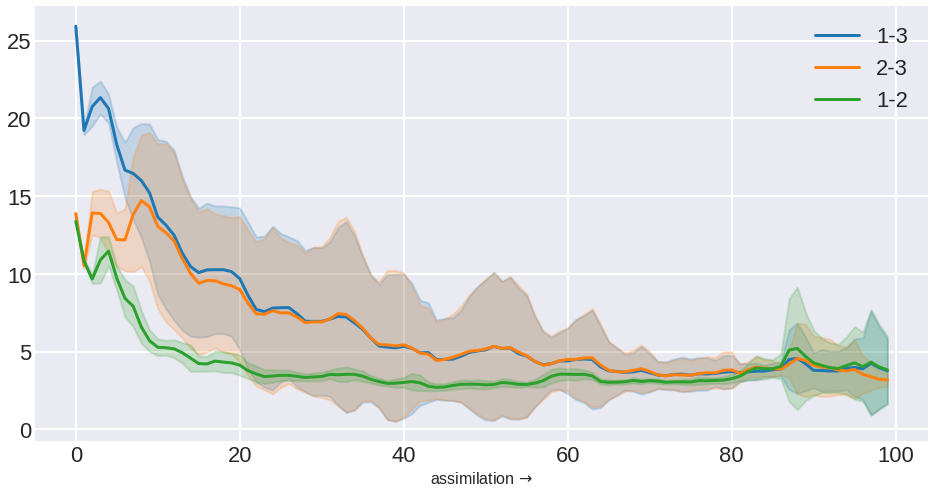

In [165]:
#seaborn lineplot
x=np.arange(100)
x_for_lineplot = np.repeat(x,10)
y1_for_lineplot = dist1.flatten('C')
y2_for_lineplot = dist2.flatten('C')
y3_for_lineplot = dist3.flatten('C')
plt.figure(figsize=(16,8))
sns.lineplot(x_for_lineplot,y1_for_lineplot,label='1-3',ci="sd")
sns.lineplot(x_for_lineplot,y2_for_lineplot,label='2-3',ci="sd")
sns.lineplot(x_for_lineplot,y3_for_lineplot,label='1-2',ci="sd")
plt.xlabel(r'assimilation $\to$',fontsize=16)

## Above plots for 400 assimilation steps, plotted for every 4 steps

In [166]:
dist4=np.load('a_distance_between_bias,cov=4.0_1.0and0.0_0.1_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to400.npy')
dist5=np.load('a_distance_between_bias,cov=4.0_1.0and2.0_0.5_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to400.npy')
dist6=np.load('a_distance_between_bias,cov=2.0_0.5and0.0_0.1_for_mu=1.0,ob_gap=0.1_for_N=50_1to10_t=0to400.npy')

/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'assimilation $\\to$')

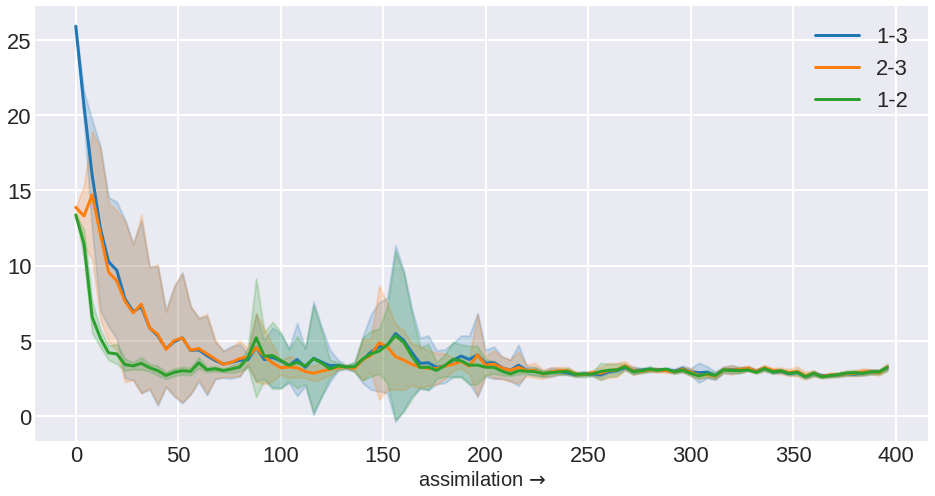

In [167]:
#seaborn lineplot
x=np.arange(400)[::4]
x_for_lineplot = np.repeat(x,10)
y4_for_lineplot = dist4.flatten('C')
y5_for_lineplot = dist5.flatten('C')
y6_for_lineplot = dist6.flatten('C')
plt.figure(figsize=(16,8))
sns.lineplot(x_for_lineplot,y4_for_lineplot,label='1-3',ci="sd")
sns.lineplot(x_for_lineplot,y5_for_lineplot,label='2-3',ci="sd")
sns.lineplot(x_for_lineplot,y6_for_lineplot,label='1-2',ci="sd")
plt.xlabel(r'assimilation $\to$',fontsize=20)

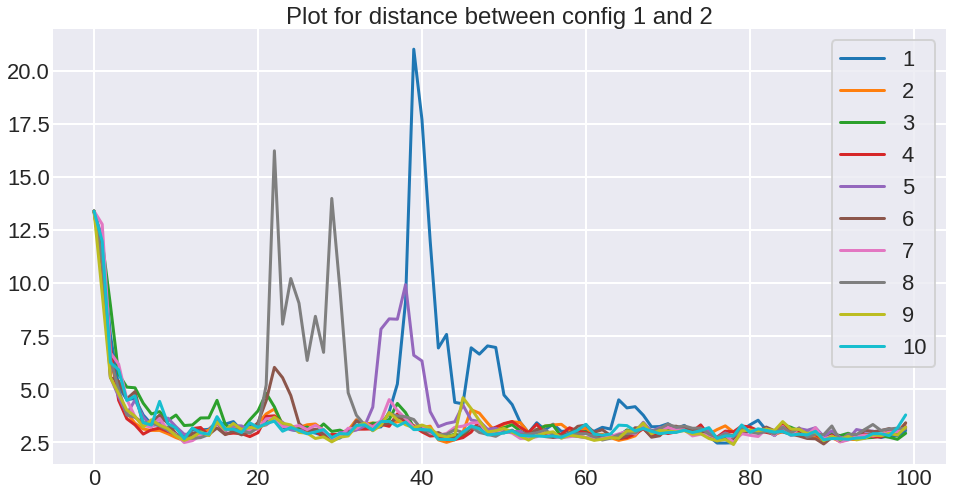

In [127]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(100),dist6,label=['{}'.format(i) for i in range(1,11)])
#plt.plot(np.arange(400),np.mean(dist2,axis=1),label='a1,3')
plt.title('Plot for distance between config 1 and 2')
plt.legend(frameon=True)

In [158]:
l = []
x=4
N=81

#Append x^i mod N values
for i in range (1,50):
    if((x**i) % N==1):
        print(i)




27


In [159]:
4**27%81

1